In [1]:
import matplotlib.pyplot as plt
from generators import *

In [2]:
print("CUDA device name:", torch.cuda.is_available())
print(torch.version.cuda)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

CUDA device name: True
12.8


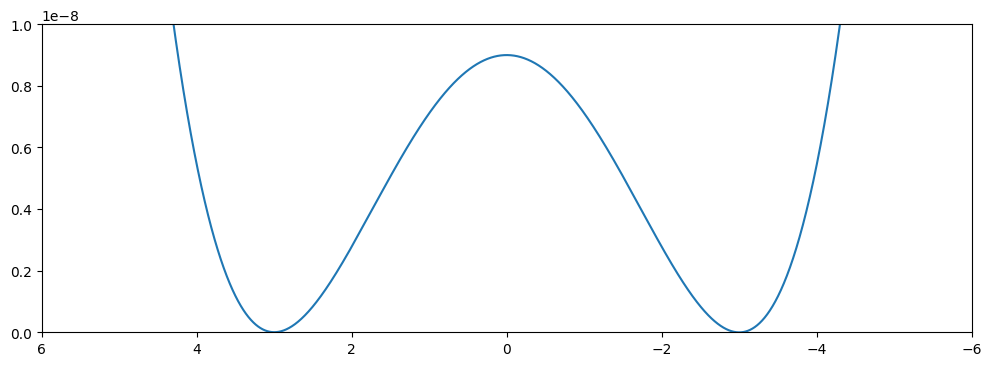

In [3]:
from utils import *

boltzman= 1.38e-11
zeta = 2.24e-9

T = 300
D = (T*boltzman)/zeta
t0=0
total_time = 30
time_step = 4e-3

barrier_height=0.9e-8
left_well=3
right_well=-3
x0_mean=0
tilt=1e-12#2e-50

pos=torch.arange(-10,10,1e-3)
y=graph_potential(pos,barrier_height,left_well=left_well,right_well=right_well,tilt=tilt)
plt.figure(figsize=(12,4))
plt.plot(pos.detach().cpu().numpy(),y.detach().cpu().numpy())
plt.ylim(0,barrier_height+1e-9)
plt.xlim(left_well*2,right_well*2)
plt.show()

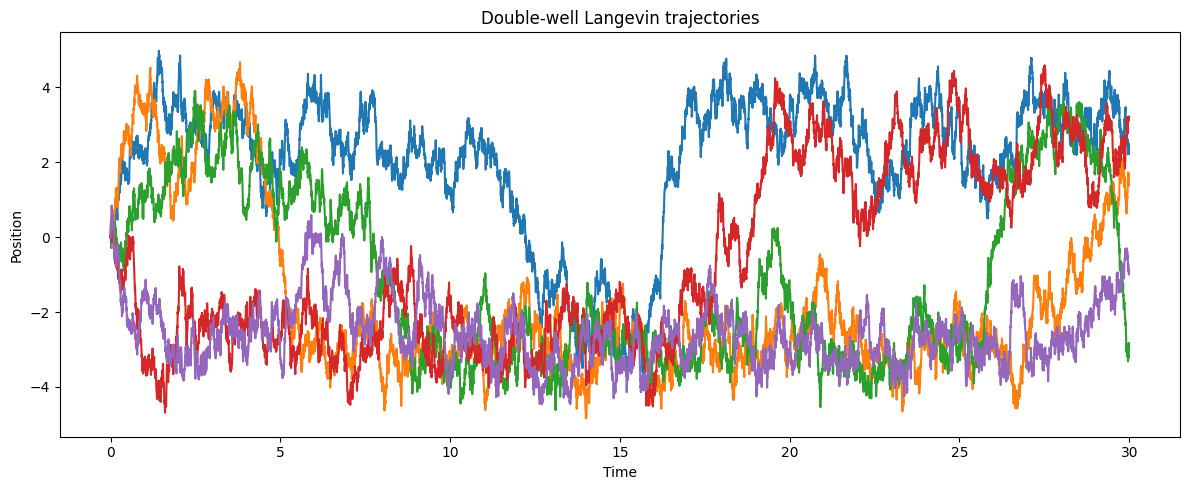

In [4]:
plt.figure(figsize=(12, 5))

dw,dwt=double_wells_generator(total_time=total_time, zeta=zeta,T=T,time_step=time_step,boltzmann=boltzman,right_well=right_well,left_well=left_well,
                          barrier_height=barrier_height,x0_mean=x0_mean,device=device  ,num_of_simulations=5,tilt=tilt)

for i in range(dw.shape[0]):
    plt.plot(dwt.cpu().numpy(), dw[i].cpu().numpy())
plt.title("Double-well Langevin trajectories")
plt.xlabel("Time")
plt.ylabel("Position")

plt.tight_layout()
plt.show()